In [1]:
import numpy as np
import pandas as pd
import datetime
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import os.path
import csv
from pathlib import Path

In [2]:
ticker = "AAPL"


end_date = datetime.date(2018,12,31)
start_date = datetime.date(2017, 1, 1)

# Get 1 year's worth of historical data for AAPL
df = get_historical_data(ticker, start_date, end_date,  output_format='pandas')
df.head()

,open,high,low,close,volume
date,,,,,
2017-01-03,115.80,116.33,114.76,116.15,28781865
2017-01-04,115.85,116.51,115.75,116.02,21118116
2017-01-05,115.92,116.86,115.81,116.61,22193587
2017-01-06,116.78,118.16,116.47,117.91,31751900
2017-01-09,117.95,119.43,117.94,118.99,33561948


In [3]:
import googlefinance
import yahoofinancials

In [4]:
# from yahoofinancials import YahooFinancials

# ticker = 'AAPL'
# yahoo_financials = YahooFinancials(ticker)

# balance_sheet_data_qt = yahoo_financials.get_financial_stmts('quarterly', 'balance')
# income_statement_data_qt = yahoo_financials.get_financial_stmts('quarterly', 'income')
# all_statement_data_qt =  yahoo_financials.get_financial_stmts('quarterly', ['income', 'cash', 'balance'])
# apple_earnings_data = yahoo_financials.get_stock_earnings_data()
# apple_net_income = yahoo_financials.get_net_income()
# historical_stock_prices = yahoo_financials.get_historical_price_data('2008-09-15', '2018-09-15', 'daily')


In [5]:
#
# THIS IS WHAT WE CAN USE!!!!
#
#

# from pandas_datareader import data


# df = data.DataReader('SPY', 'yahoo', '2005-01-01', '2018-12-31').filter(['Date','Adj Close'])
# df.rename(
#     columns={'Adj Close':'SPY'}, 
#     inplace=True
# )
# print(df)

In [6]:
from pandas_datareader import data

def fetch_prices_as_df(ticker,start,end):
    """ Fetch ticker adjusted closing prices for start-end date range"""
    # Caveat: only ever use the same time series, or your pickes won't be consistent.
    # TODO: implement flush=[True,False] to write new files
    serialized_ticker_file = f"./pickle_stock_data/{ticker}.pickle"
    df = None
    if os.path.exists(serialized_ticker_file):
        df = pickle.load( open( serialized_ticker_file, "rb" ) )
    else:
        df = data.DataReader(ticker,'yahoo',start,end).filter(['Date','Adj Close'])
        df.rename(columns={'Adj Close': ticker},inplace=True)
        pickle.dump( df, open( serialized_ticker_file, "wb" ) )
    return df

In [7]:
spy_df = fetch_prices_as_df('SPY','2005-01-01', '2018-12-31')
spy_df

,SPY
Date,
2005-01-03,89.905312
2005-01-04,88.806694
2005-01-05,88.193878
2005-01-06,88.642288
2005-01-07,88.515228
...,...
2018-12-24,232.183060
2018-12-26,243.914062
2018-12-27,245.786697


In [8]:
def combine_dfs(original_df,new_df):
    return pd.concat([original_df,new_df],axis="columns", join="inner")

In [9]:
tickers = ['SPY','AGG']
start = '2005-01-01'
end = '2018-12-31'

big_daddy = None

for ticker in tickers:
    big_daddy = combine_dfs(big_daddy, fetch_prices_as_df(ticker,'2005-01-01', '2018-12-31'))
    
big_daddy

,SPY,AGG
Date,,
2005-01-03,89.905312,63.249550
2005-01-04,88.806694,63.187786
2005-01-05,88.193878,63.163124
2005-01-06,88.642288,63.206306
2005-01-07,88.515228,63.187786
...,...,...
2018-12-24,232.183060,103.860847
2018-12-26,243.914062,103.664619
2018-12-27,245.786697,103.831429


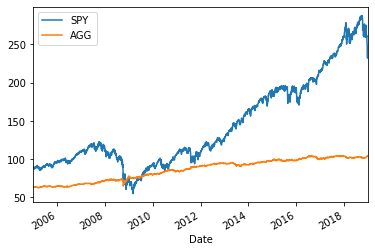

In [10]:
big_daddy.plot()

In [11]:
# TODO, tickers that wouldn't process
# DOW,DOW INC,Equity,0.12,46.97,"241,565.00","11,346,308.05","11,346,308.05",Materials,BHXCF84,US2605571031,New York Stock Exchange Inc.

In [12]:
# Flashback!
# https://rice.bootcampcontent.com/Rice-Coding-Bootcamp/RU-HOU-FIN-PT-07-2019-U-C/blob/master/class/02-Python/3/Activities/09-Ins_CSV_Reader/Solved/Untitled.ipynb

russell = Path('../data/cleandata/Russell3000-holdings.csv')
all_tickers = []
with open(russell, 'r') as holdings:
    csvreader = csv.reader(holdings, delimiter=',')
    header = next(csvreader)
    #print(f"{header} <---- HEADER")
    # Read each row of data after the header
    for row in csvreader:
        ticker = row[0]
        #print(ticker,end=",")
        if row[2] == 'Equity':
            all_tickers.append(ticker)


In [13]:
for ticker in all_tickers:
    print(ticker,end=",")
    try:
        fetch_prices_as_df(ticker,'2005-01-01', '2018-12-31')
    except:
        pass
        # TODO need to show what tickers it's breaking on

MSFT,AAPL,AMZN,FB,BRK-B,JPM,GOOG,GOOGL,JNJ,V,XOM,PG,T,HD,BAC,VZ,MA,DIS,INTC,CVX,CSCO,UNH,MRK,CMCSA,KO,PFE,BA,WFC,PEP,WMT,MCD,C,MDT,ABT,ADBE,IBM,COST,CRM,PYPL,ACN,ORCL,HON,TXN,NFLX,UNP,AMGN,TMO,PM,AVGO,SBUX,UTX,NKE,NVDA,NEE,ABBV,LIN,AMT,QCOM,LLY,MMM,LMT,LOW,DHR,BKNG,UPS,GILD,MO,CVS,AXP,FIS,BMY,USB,GE,MDLZ,SYK,CAT,CB,CME,GS,BDX,ADP,CELG,DUK,TJX,CHTR,INTU,ANTM,COP,D,SO,SPGI,PNC,CL,ISRG,CI,BSX,FISV,ZTS,NOC,CCI,MU,RTN,CSX,AGN,TGT,MS,DD,PLD,DE,ITW,SCHW,BLK,SLB,MMC,ICE,ECL,AMAT,GM,APD,GD,WM,NSC,SPG,AIG,NOW,EXC,PSX,LHX,EOG,EW,KMB,AEP,AON,EQIX,BIIB,PGR,SHW,VRTX,ILMN,COF,WBA,ADI,BAX,EL,FDX,ATVI,DG,OXY,BBT,KMI,JCI,BK,EMR,ROST,SRE,TRV,MET,AFL,SYY,PSA,MAR,ROP,F,ETN,CTSH,HUM,PRU,WELL,ALL,MCO,LRCX,MPC,VLO,YUM,HCA,DAL,TSLA,ADSK,EBAY,TWTR,XEL,GIS,STZ,NEM,EQR,PEG,ORLY,OKE,AMD,STI,IR,ED,WMB,ZBH,AVB,EA,WEC,HPQ,MCK,AZO,PPG,VFC,SBAC,APH,TROW,MSI,DFS,HLT,WDAY,IQV,LUV,INFO,XLNX,DLTR,ES,PAYX,GPN,DLR,VTR,WLTW,CMI,TDG,FE,VRSK,EIX,TMUS,A,FLT,LYB,KLAC,BLL,PCAR,TSN,TSS,APTV,DTE,PH,O,LULU,ALXN,GLW,SYF,REGN,IDXX,ADM,

In [ ]:
pd.options.display.max_columns = 3_000 # this will set limit of columns to 500
print (pd.options.display.max_columns) # <--- this will display your limit
pd.options.display.max_rows = 3_000
print(pd.options.display.max_rows)

big_daddy = None
count = 0
max = 5

for ticker in all_tickers:
    count+= 1
    #if count>=max:
    #    break
    try:
        big_daddy = combine_dfs(big_daddy, fetch_prices_as_df(ticker,'2005-01-01', '2018-12-31'))
    except:
        print(f"Ticker {ticker} failed to process")
    
    if (count % 100) == 0:
        print(big_daddy.head(1))
        print(f"Count: {count}"")



3000
3000
                 MSFT        AAPL        AMZN         FB       BRK-B  \
Date                                                                   
2015-07-06  40.533401  117.063797  436.040009  87.550003  136.889999   

                  JPM        GOOG       GOOGL        JNJ          V  \
Date                                                                  
2015-07-06  60.318233  522.859985  545.619995  87.432045  66.009155   

                  XOM         PG         T          HD        BAC         VZ  \
Date                                                                           
2015-07-06  69.944061  69.856522  28.27618  101.112259  15.755278  38.761124   

                   MA         DIS      INTC        CVX       CSCO         UNH  \
Date                                                                            
2015-07-06  91.854416  109.110947  26.65189  79.550522  23.959673  114.220894   

                  MRK      CMCSA         KO        PFE          BA        

From cffi callback <function _verify_callback at 0x00000212F1A69950>:
Traceback (most recent call last):
  File "C:\Users\willi\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 306, in wrapper
    @wraps(callback)
KeyboardInterrupt


Ticker PKD failed to process
Empty DataFrame
Columns: [MSFT, AAPL, AMZN, FB, BRK-B, JPM, GOOG, GOOGL, JNJ, V, XOM, PG, T, HD, BAC, VZ, MA, DIS, INTC, CVX, CSCO, UNH, MRK, CMCSA, KO, PFE, BA, WFC, PEP, WMT, MCD, C, MDT, ABT, ADBE, IBM, COST, CRM, PYPL, ACN, ORCL, HON, TXN, NFLX, UNP, AMGN, TMO, PM, AVGO, SBUX, UTX, NKE, NVDA, NEE, ABBV, LIN, AMT, QCOM, LLY, MMM, LMT, LOW, DHR, BKNG, UPS, GILD, MO, CVS, AXP, FIS, BMY, USB, GE, MDLZ, SYK, CAT, CB, CME, GS, BDX, ADP, CELG, DUK, TJX, CHTR, INTU, ANTM, COP, D, SO, SPGI, PNC, CL, ISRG, CI, BSX, FISV, ZTS, NOC, CCI, ...]
Index: []
Ticker TPTX failed to process
Ticker MNRL failed to process
Ticker GOSS failed to process
Ticker PD failed to process
Ticker PLMR failed to process
Ticker DSSI failed to process
Empty DataFrame
Columns: [MSFT, AAPL, AMZN, FB, BRK-B, JPM, GOOG, GOOGL, JNJ, V, XOM, PG, T, HD, BAC, VZ, MA, DIS, INTC, CVX, CSCO, UNH, MRK, CMCSA, KO, PFE, BA, WFC, PEP, WMT, MCD, C, MDT, ABT, ADBE, IBM, COST, CRM, PYPL, ACN, ORCL, HON, TXN

In [19]:
pd.options.display.max_columns = 3_000 # this will set limit of columns to 500
print (pd.options.display.max_columns) # <--- this will display your limit

3000
